In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [3]:
Lifexp = pd.read_csv('/content/Life Expectancy Data.csv')
Lifexp.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


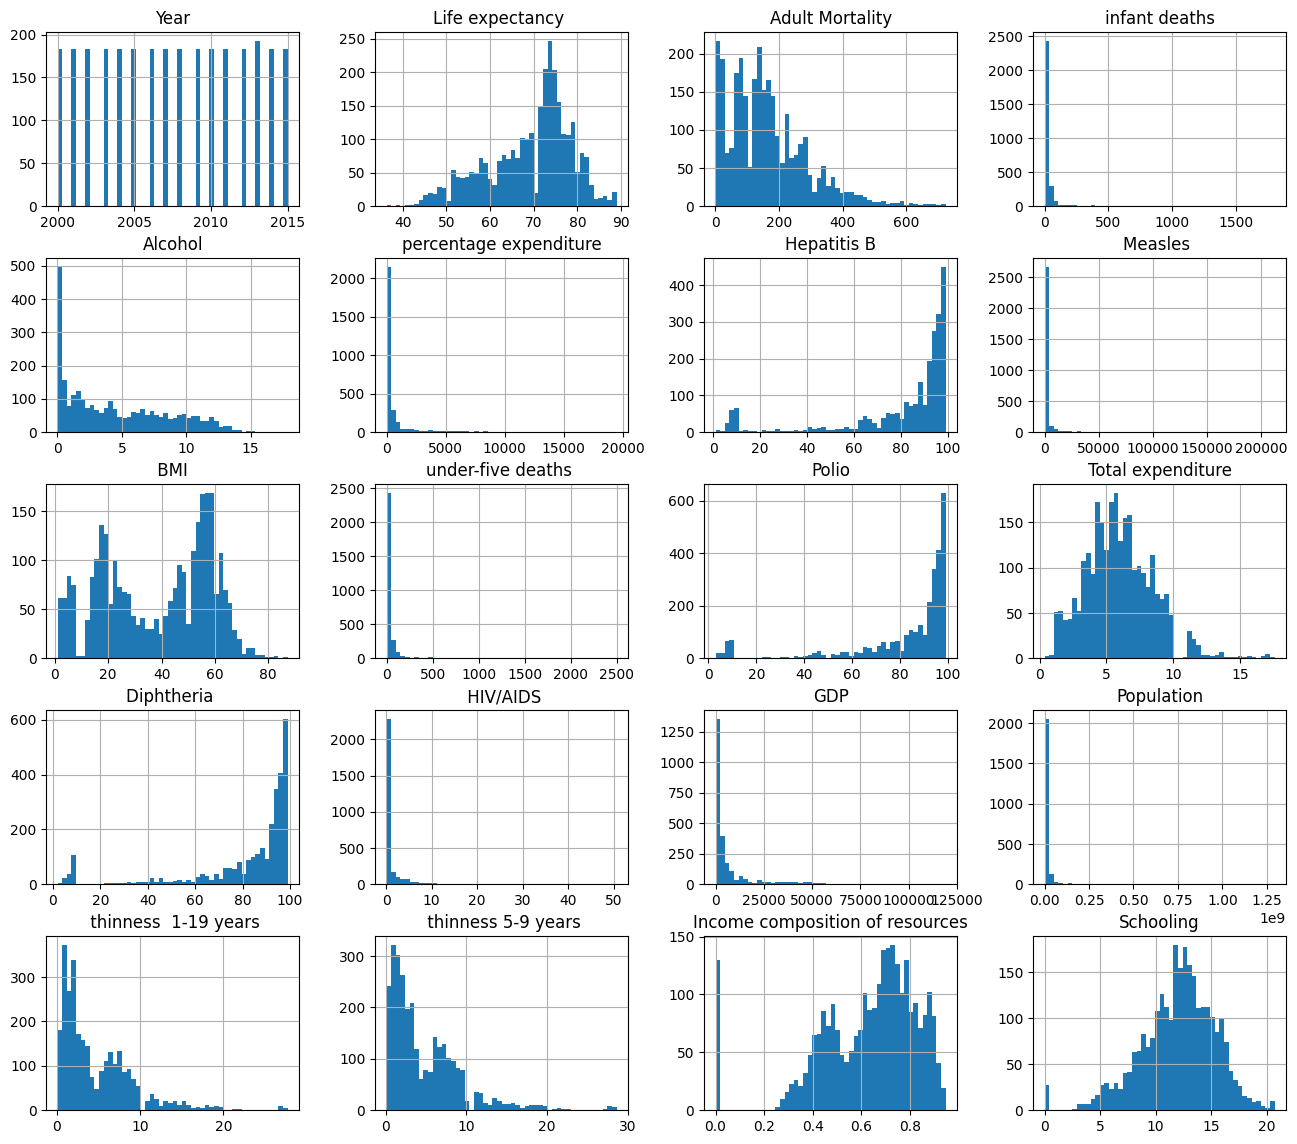

In [4]:
Lifexp.hist(bins=50, figsize=(16,14))
plt.show()

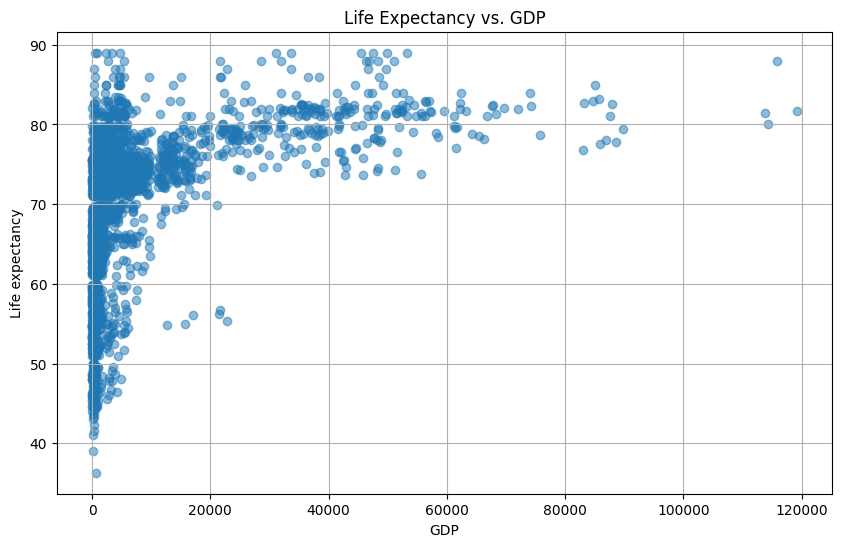

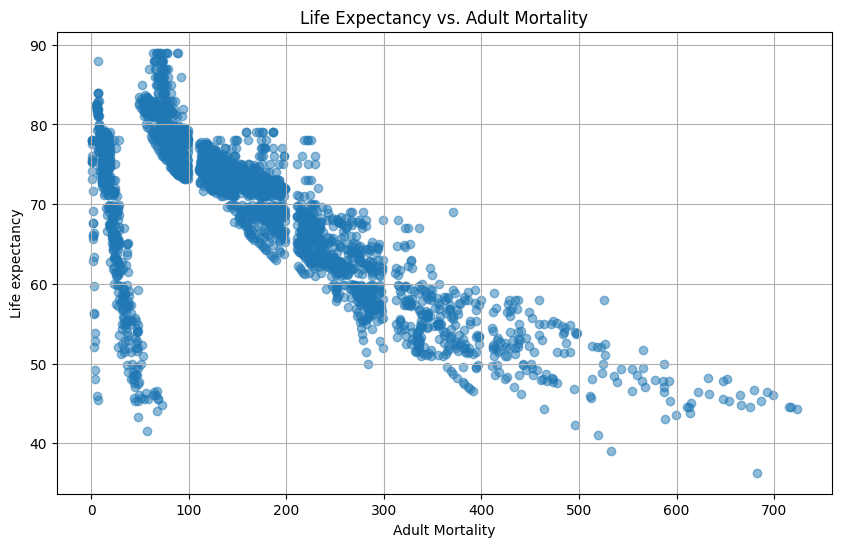

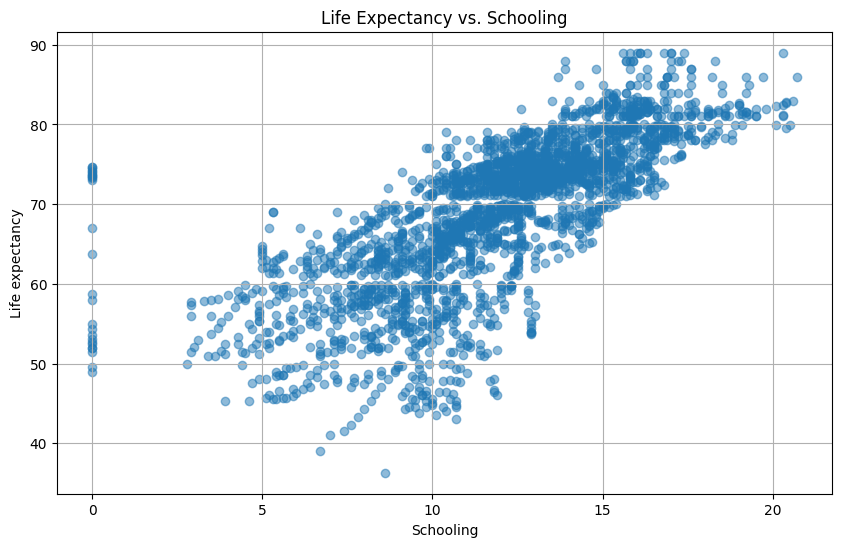

In [5]:

plt.figure(figsize=(10, 6))
plt.scatter(Lifexp['GDP'], Lifexp['Life expectancy '], alpha=0.5)
plt.xlabel('GDP')
plt.ylabel('Life expectancy')
plt.title('Life Expectancy vs. GDP')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(Lifexp['Adult Mortality'], Lifexp['Life expectancy '], alpha=0.5)
plt.xlabel('Adult Mortality')
plt.ylabel('Life expectancy')
plt.title('Life Expectancy vs. Adult Mortality')
plt.grid(True)
plt.show()

plt.figure(figsize=(10,6))
plt.scatter(Lifexp['Schooling'], Lifexp['Life expectancy '], alpha=0.5)
plt.xlabel('Schooling')
plt.ylabel('Life expectancy')
plt.title('Life Expectancy vs. Schooling')
plt.grid(True)
plt.show()

In [6]:
Lifexp.isna().sum()

,0
Country,0
Year,0
Status,0
Life expectancy,10
Adult Mortality,10
infant deaths,0
Alcohol,194
percentage expenditure,0
Hepatitis B,553
Measles,0


In [7]:

Lifexp.dropna(inplace=True)

Lifexp.isna().sum()


,0
Country,0
Year,0
Status,0
Life expectancy,0
Adult Mortality,0
infant deaths,0
Alcohol,0
percentage expenditure,0
Hepatitis B,0
Measles,0


In [9]:
X = Lifexp[['Schooling', 'GDP', 'Adult Mortality']]
y = Lifexp['Life expectancy ']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
lr = LinearRegression()

In [12]:
lr.fit(X_train.values,y_train)

LinearRegression()

In [13]:
y_pred = lr.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [14]:
r2_score( y_test, y_pred)

0.7039574495196383

In [15]:
print(lr.intercept_)

55.782434593312324


In [16]:
lr.predict(X[0:1])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


array([62.63471625])

In [17]:
import pickle

In [18]:
# save
with open('model.pkl','wb') as f:
    pickle.dump(lr,f)

In [19]:
# load
with open('model.pkl', 'rb') as f:
    clf2 = pickle.load(f)

In [20]:
X[0:5]

,Schooling,GDP,Adult Mortality
0,10.1,584.259210,263.0
1,10.0,612.696514,271.0
2,9.9,631.744976,268.0
3,9.8,669.959000,272.0
4,9.5,63.537231,275.0


In [21]:
clf2.predict(X[0:5])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


array([62.63471625, 62.21872387, 62.1656017 , 61.88243077, 61.28283423])

In [22]:
predictions = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(predictions.head())

      Actual  Predicted
1210    67.5  72.162882
2273    73.8  72.503819
1005    79.1  80.366108
2926    54.9  56.009626
518     48.6  50.667574


      Actual  Predicted
1210    67.5  72.162882
2273    73.8  72.503819
1005    79.1  80.366108
2926    54.9  56.009626
518     48.6  50.667574


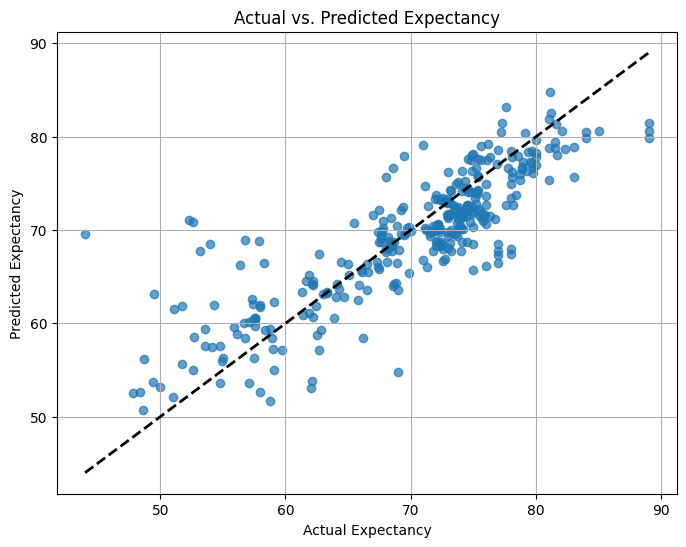

In [25]:
predictions = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(predictions.head())

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2) # Add a diagonal line for reference
plt.xlabel('Actual Expectancy')
plt.ylabel('Predicted Expectancy')
plt.title('Actual vs. Predicted Expectancy')
plt.grid(True)
plt.show()

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

In [27]:
X = X.values
y = y.values

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
print("Shape of X:", X_train.shape)
print("Shape of y:", y_train.shape)

Shape of X: (1319, 3)
Shape of y: (1319,)


In [30]:
model_multiple = LinearRegression()

# Train the model
model_multiple.fit(X_train, y_train)

y_pred_multiple = model_multiple.predict(X_test)

mse_multiple = mean_squared_error(y_test, y_pred_multiple)
r2_multiple = r2_score(y_test, y_pred_multiple)

print("\nMultiple Linear Regression")
print(f"  Mean Squared Error: {mse_multiple:.4f}")
print(f"  R² Score: {r2_multiple:.4f}")


Multiple Linear Regression
  Mean Squared Error: 21.0257
  R² Score: 0.7040


In [31]:
print(model_multiple.intercept_)

55.782434593312324


In [32]:
type(model_multiple)

sklearn.linear_model._base.LinearRegression

In [33]:
model_multiple.predict(X[0:5])

array([62.63471625, 62.21872387, 62.1656017 , 61.88243077, 61.28283423])

In [34]:
import pandas as pd
# Display the first few predictions alongside the actual values
predictions = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_multiple})
print(predictions.head())

   Actual  Predicted
0    67.5  72.162882
1    73.8  72.503819
2    79.1  80.366108
3    54.9  56.009626
4    48.6  50.667574
